## 1. missing data management

In [5]:
## neu data exploration

import pandas as pd
import json

# JSON-Datei laden (Pfad anpassen)
file_path = r"C:\Users\SinaElBasiouni\Documents\Data_Structures_Algorithms\Projekt\DSA2025_birds\web-app\backend\data\courses.json"
with open(file_path, encoding="utf-8") as f:
    data = json.load(f)

# Angenommen, die relevanten Daten befinden sich unter dem Schlüssel "veranstaltungen" > "veranstaltung"
df = pd.DataFrame(data["veranstaltungen"]["veranstaltung"])

# 1. Erste Zeilen anzeigen
print("Erste Zeilen des DataFrames:")
print(df.head())

# 2. Form und Spalten anzeigen
print("\nDataFrame Form (Zeilen, Spalten):", df.shape)
print("Spaltennamen:", df.columns.tolist())

# 3. Informationen zu Datentypen und fehlenden Werten
print("\nInformationen zu Datentypen und fehlenden Werten:")
print(df.info())

# 4. Statistische Übersicht (für alle Spalten)
print("\nStatistische Übersicht:")
print(df.describe(include="all"))

# 5. Überprüfung auf fehlende Werte pro Spalte
print("\nFehlende Werte pro Spalte:")
print(df.isnull().sum())


Erste Zeilen des DataFrames:
     guid           nummer                                           name  \
0  604369          FK3.840  Bodypercussion -  der rhythmische Körperklang   
1  610723  FK4.D-ik-179-5a                                   Deutsch B1.1   
2  656403   SZ810-29-04-01                 Deutsch Integrationskurs A1.1    
3  658796   Mi404-B192S-13                      Deutsch Orientierungskurs   
4  683442       Sp4.224.W9                    Deutsch Alphabetisierung W9   

                                  untertitel                    bezirk  \
0                                       None  Friedrichshain-Kreuzberg   
1                              Aufbaumodul 5  Friedrichshain-Kreuzberg   
2                    Basissprachkurs Modul 1       Steglitz-Zehlendorf   
3                                       None                     Mitte   
4  Deutsch Alphabetisierung-Integrationskurs                   Spandau   

                          dvv_kategorie veranstaltungsart  \
0 

In [6]:
# missing data management
# finding out which columns have critical missing values

import pandas as pd

# Fehlende Werte pro Spalte zählen
missing_counts = df.isnull().sum()

# Fehlende Werte in Prozent berechnen
missing_percent = (missing_counts / len(df)) * 100

# Zusammenfassen in einem DataFrame
missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing Percentage": missing_percent
})

# Nach fehlendem Anteil sortieren
missing_summary_sorted = missing_summary.sort_values("Missing Percentage", ascending=False)
print(missing_summary_sorted)


                         Missing Count  Missing Percentage
merkmale                          7214           85.809445
zielgruppe                        6401           76.138932
untertitel                        3947           46.948971
dozent                              64            0.761270
ortetermine                         53            0.630427
veranstaltungsart                   23            0.273582
ansprechperson                       9            0.107054
schlagwort                           5            0.059474
dvv_kategorie                        0            0.000000
nummer                               0            0.000000
name                                 0            0.000000
guid                                 0            0.000000
bezirk                               0            0.000000
minimale_teilnehmerzahl              0            0.000000
aktuelle_teilnehmerzahl              0            0.000000
beginn_datum                         0            0.0000

In [ ]:
# Explanation:
# We decide to replace missing values in the 'zielgruppe', 'kosten', and 'untertitel' columns with "keine angabe" because these fields are essential for filtering and a consistent user experience.
# We also drop the 'merkmale' column since it contains redundant or insufficient information that doesn't add value to our analysis.

# Only fill missing values in columns that exist
columns_to_fill = [col for col in ['zielgruppe', 'kosten', 'merkmale','untertitel'] if col in df.columns]
df[columns_to_fill] = df[columns_to_fill].fillna("keine angabe")


# Optional: print the updated DataFrame to verify changes
print(df.head())

# we can see that missing values (for example, in the untertitel column) have been replaced with "keine angabe".The "merkmale" column, which had too many missing values and was not relevant, has been dropped.
# This result shows a cleaned DataFrame with now 22 columns, where all previously missing entries in the relevant columns have been replaced with "keine angabe". 
# This makes the data more consistent and organized for further analysis or integration into the web app.

     guid           nummer                                           name  \
0  604369          FK3.840  Bodypercussion -  der rhythmische Körperklang   
1  610723  FK4.D-ik-179-5a                                   Deutsch B1.1   
2  656403   SZ810-29-04-01                 Deutsch Integrationskurs A1.1    
3  658796   Mi404-B192S-13                      Deutsch Orientierungskurs   
4  683442       Sp4.224.W9                    Deutsch Alphabetisierung W9   

                                  untertitel                    bezirk  \
0                               keine angabe  Friedrichshain-Kreuzberg   
1                              Aufbaumodul 5  Friedrichshain-Kreuzberg   
2                    Basissprachkurs Modul 1       Steglitz-Zehlendorf   
3                               keine angabe                     Mitte   
4  Deutsch Alphabetisierung-Integrationskurs                   Spandau   

                          dvv_kategorie veranstaltungsart  \
0  {'@version': '2.0', '#text':

# columns overview 
print(df.columns.tolist())

we can use following columns as filters for the website: bezirk (geographical area), dvv_kategorie (course category), veranstaltungsart (type of event/course), zielgruppe (target audience), schlagwort (keywords), preis (price), beginn_datum and ende_datum (start and end dates)

## 2. datacleaning and standartization

Explanation:
We standardize the dataset by cleaning text fields (converting to lowercase and trimming whitespace), converting date columns into proper datetime objects, and converting numeric columns (e.g. 'preis') into a numeric format. This ensures consistency and facilitates further analysis and filtering in our web app.

In [8]:
# Clean text columns: convert to lowercase and trim whitespace
text_columns = ['name', 'untertitel', 'bezirk', 'dvv_kategorie', 'veranstaltungsart', 'zielgruppe', 'schlagwort', 'text', 'anmeldung', 'ansprechperson', 'ortetermine', 'dozent', 'webadresse']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.strip()

# Convert date columns to datetime format (errors='coerce' wandelt ungültige Formate in NaT um)
date_columns = ['beginn_datum', 'ende_datum']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert numeric columns (e.g., 'preis') to a numeric format, falls sie als String vorliegen
if 'preis' in df.columns:
    df['preis'] = pd.to_numeric(df['preis'], errors='coerce')

# Optional: Ausgabe der ersten Zeilen zur Überprüfung
print(df.head())

     guid           nummer                                           name  \
0  604369          FK3.840  bodypercussion -  der rhythmische körperklang   
1  610723  FK4.D-ik-179-5a                                   deutsch b1.1   
2  656403   SZ810-29-04-01                  deutsch integrationskurs a1.1   
3  658796   Mi404-B192S-13                      deutsch orientierungskurs   
4  683442       Sp4.224.W9                    deutsch alphabetisierung w9   

                                  untertitel                    bezirk  \
0                               keine angabe  friedrichshain-kreuzberg   
1                              aufbaumodul 5  friedrichshain-kreuzberg   
2                    basissprachkurs modul 1       steglitz-zehlendorf   
3                               keine angabe                     mitte   
4  deutsch alphabetisierung-integrationskurs                   spandau   

                          dvv_kategorie veranstaltungsart  \
0  {'@version': '2.0', '#text':

# 2.1. flattening nested columns

In [9]:
# This function iterates over each item in the list stored in the "text" column, extracts the value under the key "text" (after stripping extra whitespace), 
# and concatenates all the text segments into one string. The resulting string is then stored in a new column "text_clean", 
# making the data easier to work with for filtering and analysis.

# Define a function to extract text from a nested structure (e.g., list of dictionaries)
def extract_text_from_nested(data):
    if isinstance(data, list):
        texts = []
        for entry in data:
            if isinstance(entry, dict) and "text" in entry:
                texts.append(entry["text"].strip())
        return " ".join(texts)
    return None

# Apply the function to create a new, cleaned text column
df["text_clean"] = df["text"].apply(extract_text_from_nested)

# Optional: Check the result
print(df[["text", "text_clean"]].head())


                                                text text_clean
0  [{'eigenschaft': 'beschreibung', 'text': 'body...       None
1  [{'eigenschaft': 'beschreibung', 'text': 'vora...       None
2  [{'eigenschaft': 'beschreibung', 'text': 'der ...       None
3  [{'eigenschaft': 'beschreibung', 'text': 'dies...       None
4  [{'eigenschaft': 'beschreibung', 'text': 'dies...       None


In [10]:
# This code defines a function that iterates through each element in the "anmeldung" column (assuming it is a list of dictionaries), extracts the value from the key "text", 
# and joins all the parts together into a single string. The cleaned result is stored in a new column called "anmeldung_clean". 
# You can apply a similar approach to any other nested columns you need to flatten.

def extract_anmeldung_info(data):
    """
    Extracts text information from a nested structure in the 'anmeldung' column.
    If the data is a list of dictionaries, it will join the values under the key 'text'.
    Adjust the key if needed to match your data structure.
    """
    if isinstance(data, list):
        values = []
        for item in data:
            if isinstance(item, dict) and "text" in item:
                values.append(item["text"].strip())
        return " ".join(values)
    return None

# Apply the extraction function if the "anmeldung" column exists
if "anmeldung" in df.columns:
    df["anmeldung_clean"] = df["anmeldung"].apply(extract_anmeldung_info)

# Optional: Print a preview of the original "anmeldung" column and the new cleaned version
print(df[["anmeldung", "anmeldung_clean"]].head())

                                           anmeldung anmeldung_clean
0  {'telefon': '90298-4600', 'mail': 'vhs@ba-fk.b...            None
1  {'telefon': '90298-4600', 'mail': 'vhs@ba-fk.b...            None
2  {'telefon': '(030) 90299 6156', 'mail': 'vhs-s...            None
3  {'telefon': '9018 37474', 'mail': 'infoservice...            None
4  {'telefon': '90279 5000', 'mail': 'info@vhs-sp...            None


In [11]:
# This code defines a function that checks whether the data in dvv_kategorie is a list of dictionaries. 
# If it is, it extracts the value from the key "kategorie", cleans it up by stripping whitespace, and joins all values with a comma. 
# If the data isn’t nested, it simply converts it to a stripped string. This approach makes the dvv_kategorie column flat and consistent for further analysis or filtering.

# Function to extract category information from a nested 'dvv_kategorie' column
def extract_dvv_kategorie(data):
    if isinstance(data, list):
        categories = []
        for item in data:
            if isinstance(item, dict) and "kategorie" in item:
                categories.append(item["kategorie"].strip())
        return ", ".join(categories)
    return str(data).strip()

# Apply the function if the column exists
if "dvv_kategorie" in df.columns:
    df["dvv_kategorie_clean"] = df["dvv_kategorie"].apply(extract_dvv_kategorie)

# Optional: Print a preview of the original and cleaned 'dvv_kategorie' columns
print(df[["dvv_kategorie", "dvv_kategorie_clean"]].head())


                          dvv_kategorie                   dvv_kategorie_clean
0  {'@version': '2.0', '#text': '3.00'}  {'@version': '2.0', '#text': '3.00'}
1  {'@version': '2.0', '#text': '4.04'}  {'@version': '2.0', '#text': '4.04'}
2  {'@version': '2.0', '#text': '4.04'}  {'@version': '2.0', '#text': '4.04'}
3  {'@version': '2.0', '#text': '4.04'}  {'@version': '2.0', '#text': '4.04'}
4  {'@version': '2.0', '#text': '4.04'}  {'@version': '2.0', '#text': '4.04'}


# 2.2. last step of data cleaning


In [12]:
print(df["preis"].value_counts(dropna=False))

# since price has too many NaNs, i'll drop this column

#df = df.drop(columns=['preis'])
#print(df.columns.tolist())  # Verify the column has been removed


preis
NaN    8407
Name: count, dtype: int64


minimale_teilnehmerzahl    int64
aktuelle_teilnehmerzahl    int64
maximale_teilnehmerzahl    int64
dtype: object


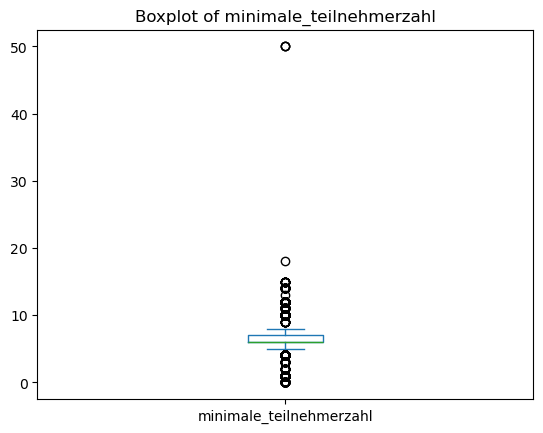

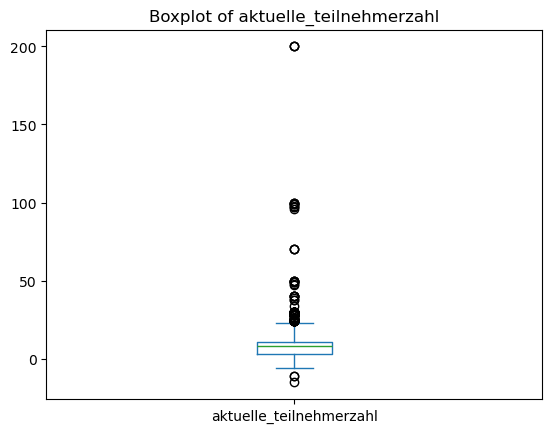

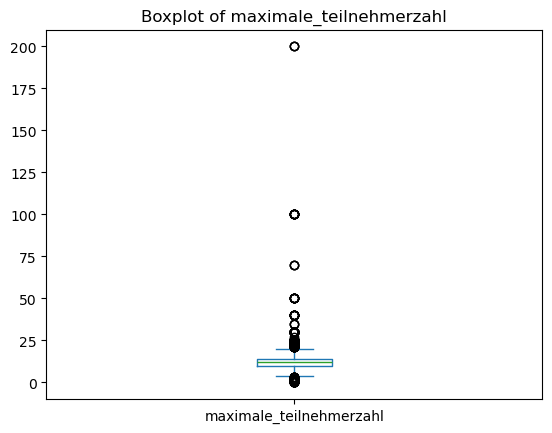

In [13]:
# plotting the max and min teilnehmerzahl to get an overview 

numeric_columns = ['minimale_teilnehmerzahl', 'aktuelle_teilnehmerzahl', 'maximale_teilnehmerzahl']

# Convert each column to numeric, coercing errors to NaN
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now check the data types
print(df[numeric_columns].dtypes)

# Plot the Boxplots again
import matplotlib.pyplot as plt

for col in numeric_columns:
    plt.figure()
    df[col].plot(kind='box', title=f'Boxplot of {col}')
    plt.show()


In [ ]:
# removing negative values of the participants
import numpy as np
df["aktuelle_teilnehmerzahl"] = df["aktuelle_teilnehmerzahl"].apply(lambda x: np.nan if x < 0 else x)


### question to group member: do we want to keep the outliers?

## 2.3. final consistency check

### helps to verify that all columns have the correct data types, there are no duplicates, and the key columns (for filter options) contain the expected values

In [ ]:
# 1. Overall DataFrame info (data types, non-null counts, etc.)
print("DataFrame info:")
print(df.info())

# 2. Preview the first few rows
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# 3. Check for duplicate rows and report the count
duplicates_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates_count)

# 4. Summary statistics for numeric columns (e.g., participant numbers)
numeric_columns = ['minimale_teilnehmerzahl', 'aktuelle_teilnehmerzahl', 'maximale_teilnehmerzahl']
print("\nSummary statistics for numeric fields:")
print(df[numeric_columns].describe())

# 5. Check unique values for key filter columns to ensure consistency
filter_columns = ['dvv_kategorie_clean', 'veranstaltungsart', 'zielgruppe', 'bezirk']
for col in filter_columns:
    if col in df.columns:
        print(f"\nUnique values in '{col}' (first 10):")
        print(df[col].unique()[:10])

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407 entries, 0 to 8406
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   guid                     8407 non-null   object        
 1   nummer                   8407 non-null   object        
 2   name                     8407 non-null   object        
 3   untertitel               8407 non-null   object        
 4   bezirk                   8407 non-null   object        
 5   dvv_kategorie            8407 non-null   object        
 6   veranstaltungsart        8407 non-null   object        
 7   minimale_teilnehmerzahl  8407 non-null   int64         
 8   aktuelle_teilnehmerzahl  8407 non-null   int64         
 9   maximale_teilnehmerzahl  8407 non-null   int64         
 10  anzahl_termine           8407 non-null   object        
 11  beginn_datum             8407 non-null   datetime64[ns]
 12  ende_datum        

this data frame shows us: 
- that it has 8407 rows and 24 columns.
- all columns show 8407 non-null values, meaning there are no missing values in these displayed columns.
- the data types are correct – for example, the beginn_datum and ende_datum columns are in datetime64[ns] format.
- the bezirk column shows multiple unique values (e.g., "friedrichshain-kreuzberg", "steglitz-zehlendorf", "mitte", etc.), which is expected for a Berlin district.

our dataframe is largely consistent: there are no obvious missing values in the shown columns, the data types are appropriate, and the distribution in key columns (like bezirk) is plausible.

## 2.4. adding class based filter system

In [ ]:
# creating "duration_days" column. i need to compute this column from your "beginn_datum" and "ende_datum" columns before you use it in your filter functions.

# ensuring my date columns are in datetime format
df["beginn_datum"] = pd.to_datetime(df["beginn_datum"], errors="coerce")
df["ende_datum"] = pd.to_datetime(df["ende_datum"], errors="coerce")

# Compute duration in days
df["duration_days"] = (df["ende_datum"] - df["beginn_datum"]).dt.days

# Check the new column
print(df[["beginn_datum", "ende_datum", "duration_days"]].head())


  beginn_datum ende_datum  duration_days
0   2025-03-29 2025-03-30              1
1   2025-05-05 2025-07-11             67
2   2025-04-02 2025-05-19             47
3   2025-05-02 2025-06-30             59
4   2025-05-13 2025-06-25             43


## 3. Coursefilter class

the following code defines a `CourseFilter` class that takes a cleaned DataFrame of course data and provides multiple filtering functions. It includes methods:

- **Filter by Location:**  
  Uses the `"bezirk"` column to match a specified location.

- **Filter by Category:**  
  Uses the `"dvv_kategorie_clean"` column to filter courses by given category codes (e.g., "3.00" or "4.04").

- **Filter by Duration:**  
  Filters courses based on a precomputed `"duration_days"` column (derived from start and end dates) to return courses within a specified day range.

- **Filter by Target Audience:**  
  Searches the `"zielgruppe"` column for a specific term (e.g., "Menschen mit Migrationshintergrund").

- **Derive Time Period:**  
  Adds a `"time_period"` column by extracting the hour from `"beginn_datum"` and categorizing it as morning, afternoon, or evening.

- **Filter by Cost:**  
  Attempts to convert the `"preis"` column to numeric values and filters courses by a given cost range, or returns the DataFrame unfiltered if no valid cost data is available.

- **Classify by Keywords:**  
  Combines `"name"` and `"text_clean"` to classify courses into levels (e.g., beginner, intermediate, advanced) based on predefined keywords.

- **Apply All Filters:**  
  Sequentially applies the above filters based on provided criteria and returns a filtered DataFrame.

**Aim:**  
This code creates a flexible filtering system for your dataset, enabling us to search for courses by location, category, duration, target audience, cost, and even by keyword-based classification—ideal for a web application where precise course filtering is required.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

class CourseFilter:
    def __init__(self, df):
        # Initialize with a copy of the cleaned DataFrame
        self.df = df.copy()
    
    def filter_by_location(self, location):
        """
        Filter courses based on the 'bezirk' column.
        """
        filtered = self.df[self.df["bezirk"].str.lower() == location.lower()]
        return filtered

    def filter_by_category(self, categories):
        """
        Filter courses based on a list of category codes.
        Uses 'dvv_kategorie_clean' for filtering.
        """
        if "dvv_kategorie_clean" not in self.df.columns:
            raise KeyError("Column 'dvv_kategorie_clean' does not exist.")
        filtered = self.df[self.df["dvv_kategorie_clean"].isin(categories)]
        return filtered

    def filter_by_duration(self, min_days=None, max_days=None):
        """
        Filter courses based on their duration in days.
        Assumes a 'duration_days' column exists.
        """
        if "duration_days" not in self.df.columns:
            raise KeyError("Column 'duration_days' does not exist.")
        filtered = self.df
        if min_days is not None:
            filtered = filtered[filtered["duration_days"] >= min_days]
        if max_days is not None:
            filtered = filtered[filtered["duration_days"] <= max_days]
        return filtered

    def filter_by_target_audience(self, audience):
        """
        Filter courses based on the 'zielgruppe' column.
        """
        if "zielgruppe" not in self.df.columns:
            raise KeyError("Column 'zielgruppe' does not exist.")
        filtered = self.df[self.df["zielgruppe"].str.contains(audience, case=False, na=False)]
        return filtered

    def add_time_period_column(self):
        """
        Creates a new 'time_period' column based on the hour of the start date ('beginn_datum').
        Categorizes as 'morning' (<12), 'afternoon' (12-18), or 'evening' (>18).
        """
        if "beginn_datum" not in self.df.columns:
            raise KeyError("Column 'beginn_datum' does not exist.")
        
        def categorize_time(hour):
            if hour < 12:
                return "morning"
            elif hour < 18:
                return "afternoon"
            else:
                return "evening"
        
        self.df["time_period"] = self.df["beginn_datum"].dt.hour.apply(categorize_time)
        return self.df

    def filter_by_cost(self, min_cost=None, max_cost=None):
        """
        Filters courses based on cost using the 'preis' column.
        If 'preis' is not available or is empty, this filter returns the unfiltered DataFrame.
        """
        if "preis" not in self.df.columns:
            print("No 'preis' column found; skipping cost filtering.")
            return self.df
        
        filtered = self.df.copy()
        # Convert 'preis' to numeric if possible; non-numeric entries become NaN.
        filtered["preis"] = pd.to_numeric(filtered["preis"], errors="coerce")
        if min_cost is not None:
            filtered = filtered[filtered["preis"] >= min_cost]
        if max_cost is not None:
            filtered = filtered[filtered["preis"] <= max_cost]
        return filtered

    def classify_by_keywords(self, keywords_dict):
        """
        Classifies courses into levels (e.g., beginner, intermediate, advanced)
        based on keywords found in the course title and cleaned description.
        Assumes 'name' and 'text_clean' columns exist.
        """
        if "name" not in self.df.columns or "text_clean" not in self.df.columns:
            raise KeyError("Columns 'name' and/or 'text_clean' do not exist.")
        
        def classify(text):
            text_lower = text.lower()
            for level, keywords in keywords_dict.items():
                if any(keyword in text_lower for keyword in keywords):
                    return level
            return "unknown"
        
        # Combine course title and cleaned description.
        combined_text = self.df["name"].astype(str) + " " + self.df["text_clean"].astype(str)
        self.df["course_level"] = combined_text.apply(classify)
        return self.df

    def apply_all_filters(self, location=None, categories=None, min_duration=None, max_duration=None,
                          target_audience=None, min_cost=None, max_cost=None, keywords_dict=None):
        """
        Applies all available filters sequentially.
        """
        filtered_df = self.df.copy()
        if location is not None:
            filtered_df = self.filter_by_location(location)
        if categories is not None:
            filtered_df = self.filter_by_category(categories)
        if min_duration is not None or max_duration is not None:
            filtered_df = self.filter_by_duration(min_duration, max_duration)
        if target_audience is not None:
            filtered_df = self.filter_by_target_audience(target_audience)
        if min_cost is not None or max_cost is not None:
            filtered_df = self.filter_by_cost(min_cost, max_cost)
        if keywords_dict is not None:
            filtered_df = self.classify_by_keywords(keywords_dict)
        return filtered_df

# Example usage:
# Assume 'df' is your cleaned DataFrame with these columns:
# 'bezirk', 'dvv_kategorie_clean', 'duration_days', 'zielgruppe',
# 'beginn_datum', 'preis', 'name', and 'text_clean'.
#
# Before using the filters, make sure that 'duration_days' has been computed
# and 'beginn_datum' is in datetime format.

# For example, if not already done, compute duration_days:
df["beginn_datum"] = pd.to_datetime(df["beginn_datum"], errors="coerce")
df["ende_datum"] = pd.to_datetime(df["ende_datum"], errors="coerce")
df["duration_days"] = (df["ende_datum"] - df["beginn_datum"]).dt.days

# Create the CourseFilter object:
course_filter = CourseFilter(df)

# Add the derived time period column:
course_filter.add_time_period_column()

# Define a keywords dictionary for classifying course levels:
keywords = {
    "beginner": ["introduction", "basic", "beginner"],
    "intermediate": ["intermediate", "moderate", "continuing"],
    "advanced": ["advanced", "expert", "professional"]
}

# Apply filters as needed:
filtered_courses = course_filter.apply_all_filters(
    location="mitte",             # Filter by location (using 'bezirk')
    categories=["3.00", "4.04"],   # Filter by category (using 'dvv_kategorie_clean')
    min_duration=1,               # Minimum duration in days
    max_duration=10,              # Maximum duration in days
    target_audience="Menschen mit Migrationshintergrund",  # Filter by target audience (using 'zielgruppe')
    min_cost=0,                   # Cost filter (using 'preis')
    max_cost=100,                 # Cost filter
    keywords_dict=keywords        # Classify courses into levels
)

print(filtered_courses.head())

     guid           nummer                                           name  \
0  604369          FK3.840  bodypercussion -  der rhythmische körperklang   
1  610723  FK4.D-ik-179-5a                                   deutsch b1.1   
2  656403   SZ810-29-04-01                  deutsch integrationskurs a1.1   
3  658796   Mi404-B192S-13                      deutsch orientierungskurs   
4  683442       Sp4.224.W9                    deutsch alphabetisierung w9   

                                  untertitel                    bezirk  \
0                               keine angabe  friedrichshain-kreuzberg   
1                              aufbaumodul 5  friedrichshain-kreuzberg   
2                    basissprachkurs modul 1       steglitz-zehlendorf   
3                               keine angabe                     mitte   
4  deutsch alphabetisierung-integrationskurs                   spandau   

                          dvv_kategorie veranstaltungsart  \
0  {'@version': '2.0', '#text':

In [ ]:
# overview columns
print(df.columns.tolist())

['guid', 'nummer', 'name', 'untertitel', 'bezirk', 'dvv_kategorie', 'veranstaltungsart', 'minimale_teilnehmerzahl', 'aktuelle_teilnehmerzahl', 'maximale_teilnehmerzahl', 'anzahl_termine', 'beginn_datum', 'ende_datum', 'zielgruppe', 'schlagwort', 'text', 'anmeldung', 'ansprechperson', 'ortetermine', 'preis', 'dozent', 'webadresse', 'text_clean', 'anmeldung_clean', 'dvv_kategorie_clean', 'duration_days']


In [ ]:
# overiew first 50 rows
print(df.head(50).to_markdown(index=False))

|   guid | nummer          | name                                                                                | untertitel                                                       | bezirk                   | dvv_kategorie                        | veranstaltungsart   |   minimale_teilnehmerzahl |   aktuelle_teilnehmerzahl |   maximale_teilnehmerzahl |   anzahl_termine | beginn_datum   | ende_datum   | zielgruppe                         | schlagwort                                                                                                                                                                                                                                           | text                                                                                                                                                                                                                                                                                                                   